In [4]:
# -*- coding: utf-8 -*-
import dart_fss as dart
api_key='fcb0b5b6663759936ad3c7dbf488b1ead9459fd0'
dart.dart_set_api_key(api_key)

crp_list = dart.get_crp_list() # default 모든 시장
samsung_electronics = crp_list.find_by_name('삼성전자')[0] # 리스트 반환

# 오늘 공시된 전자공시 조회
today = dart.search_report() 

# 특정기간 검색 (3개월 이내)
reports = dart.search_report(start_dt='20190101',end_dt='20190201')
reports.page_no = 2     # 2번째 페이지로 이동
reports.next_page()     # 다음 페이지로 이동
reports.prev_page()     # 이전 페이지로 이동

# 특정회사 검색 
reports = dart.search_report(crp_cd='000660', start_dt='20190101') # 하이닉스
# 또는
reports = samsung_electronics.search_report(start_dt='20190101')

# 검색결과 필터링
reports = reports.filter(bsn_tp='a001') # 연말보고서만 출력

annual_report = reports[0] # 2019년 사업보고서
annual_report.pages # 2019년 사업보고서 Page List 출력

# 3번째 페이지 조회
page = annual_report[3]

# 3번째 페이지의 HTML 
html = page.html

annual_report.to_file(r'annual_report_2019') # C:\annual_report_2019에 사업보고서 저장(html 파일 형태로 파일별로 저장)

# "연결재무제표" 포함, "주석" 미포함 페이지만 로딩
annual_report.load_page(includes="연결재무제표", excludes="주석")


# 전지공시 조회 (캐싱기능 사용)
# 최대 캐싱 시간(분, 기본설정 30분)
dart.search.MAX_CACHED_MINUTES = 10 
# 최대 캐싱 검새결과 수(기본 4)
dart.search.MAX_CACHED_SEARCH_RESULTS = 2 

# 전지공시 조회 (캐싱기능 사용)
cached_reports = dart.search.search_report_with_cache(start_dt='20190101', end_dt='20190201')

Save files: 100%|██████████| 34/34 [00:00<00:00, 2898.56page/s]


In [4]:
pwd

'/home/se_heon/dart_project/src'

In [3]:
ls

annual_report_2019/          dart_practice.py
dart_practice_example.ipynb  Untitled.ipynb


In [95]:
folder_directory='/home/se_heon/dart_project/src/annual_report_2019/'
file_name='10_II.사업의내용.html'
file_directory=folder_directory+file_name

In [96]:
import pandas as pd
import numpy as np
html=pd.read_html(file_directory,'총매출액')
#display(html[0])
target_dataframe=html[0]

In [97]:
table_get=(target_dataframe['구 분']=='순매출액')
html_modi=target_dataframe[table_get['구 분']]

In [98]:
html_modi

부문              구 분       제50기              제49기              제48기  \
           부문       부문.1   구 분         금액     비중         금액     비중         금액   
2        CE부문       CE부문  순매출액   42107405  17.3%   44601347  18.6%   44680255   
7        IM부문       IM부문  순매출액  100677677  41.3%  106668318  44.5%  100302112   
12       DS부문        반도체  순매출액   86290962  35.4%   74255595  31.0%   51157002   
17       DS부문         DP  순매출액   32465019  13.3%   34465363  14.4%   26928644   
22       DS부문          계  순매출액  118565559  48.6%  108167480  45.1%   78148203   
27  Harman 부문  Harman 부문  순매출액    8843739   3.6%    7102629   3.0%          -   

           
       비중  
2   22.1%  
7   49.7%  
12  25.3%  
17  13.3%  
22  38.7%  
27      -

In [99]:
target_name_column_join='부문'
target_name_first_column=html_modi[target_name_column_join].columns[0]
target_name_second_column=html_modi[target_name_column_join].columns[1]
result_name_column_join= target_name_first_column+' - '+ target_name_second_column
list_category=[]
dataframe_for_target_column=pd.DataFrame()
size_indice=html_modi.index.size
#html_modi[target_name_column_join][target_name_first_column].iloc[0] + html_modi[target_name_column_join][target_name_second_column].iloc[0]

In [100]:
for index in range(size_indice):
    string=html_modi[target_name_column_join][target_name_first_column].iloc[index]+' - ' +html_modi[target_name_column_join][target_name_second_column].iloc[index]
    list_category.append(string)
#dataframe_for_target_column.insert(column=result_name_column_join)
list_category

['CE부문 - CE부문',
 'IM부문 - IM부문',
 'DS부문 - 반도체',
 'DS부문 - DP',
 'DS부문 - 계',
 'Harman 부문 - Harman 부문']

In [101]:
dataframe_for_target_column[result_name_column_join]=list_category

In [102]:
dataframe_for_target_column

,부문 - 부문.1
0,CE부문 - CE부문
1,IM부문 - IM부문
2,DS부문 - 반도체
3,DS부문 - DP
4,DS부문 - 계
5,Harman 부문 - Harman 부문


In [103]:
html_modi_copy=pd.DataFrame()
index_column=0
for i in html_modi.columns:
    #print(i)
    if i[0] == '구 분':
      refer_column=index_column
      start_column = refer_column + 1
      break
    index_column=index_column +1

#start_column
start_column=index_column

('부문', '부문')
('부문', '부문.1')
('구 분', '구 분')


3

In [104]:
html_modi.iloc[:,start_column:-1]

제50기              제49기              제48기
           금액     비중         금액     비중         금액
2    42107405  17.3%   44601347  18.6%   44680255
7   100677677  41.3%  106668318  44.5%  100302112
12   86290962  35.4%   74255595  31.0%   51157002
17   32465019  13.3%   34465363  14.4%   26928644
22  118565559  48.6%  108167480  45.1%   78148203
27    8843739   3.6%    7102629   3.0%          -

In [172]:
set_periods=set()
## set creation for storing target periods
for top_column_cate in html_modi.iloc[:,start_column:-1]:
    set_periods.add(top_column_cate[0])

In [173]:
set_periods_sorted=sorted(set_periods, reverse=True)
set_periods_sorted

['제50기', '제49기', '제48기']

In [179]:
## target search keyword setting
target_search_keyword='금액'

In [204]:
## create dataframe by using target search keyword
temp_df=pd.DataFrame()
for period in set_periods_sorted:
    temp_df[period]=html_modi.iloc[:,start_column:-1][period][target_search_keyword]
    #print(temp_df[period])
    temp_df[period]=temp_df[period].replace('-','0')
    temp_df[period]=pd.to_numeric(temp_df[period])
    
temp_df

,제50기,제49기,제48기
2,42107405,44601347,44680255
7,100677677,106668318,100302112
12,86290962,74255595,51157002
17,32465019,34465363,26928644
22,118565559,108167480,78148203
27,8843739,7102629,0


In [210]:
## check temp df created
temp_df.reset_index(inplace=True)
temp_df
temp_df=temp_df.drop(columns=['index'])

In [211]:
#
new_df=pd.merge(dataframe_for_target_column,temp_df,how='outer', left_index=True, right_index= True)
type(new_df['제48기'][0])

numpy.int64

In [212]:
#convert string values in columns into int

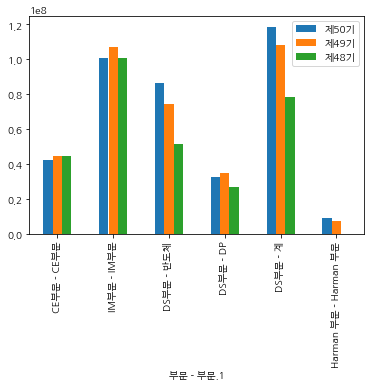

In [213]:
new_df.plot(x='부문 - 부문.1',kind='bar')